## 08-2. 합성곱 신경망을 사용한 이미지 분류

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
          padding='same', input_shape=(28, 28, 1)))

In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

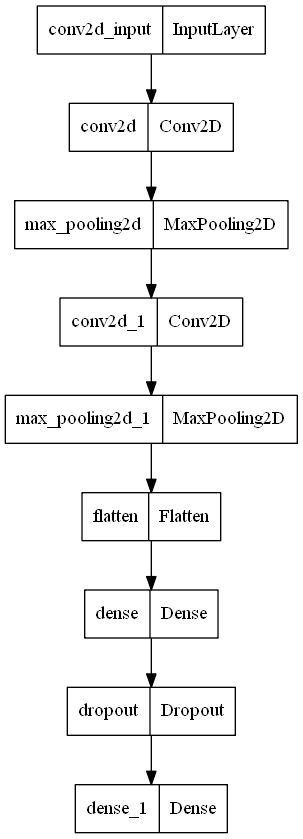

In [8]:
keras.utils.plot_model(model)

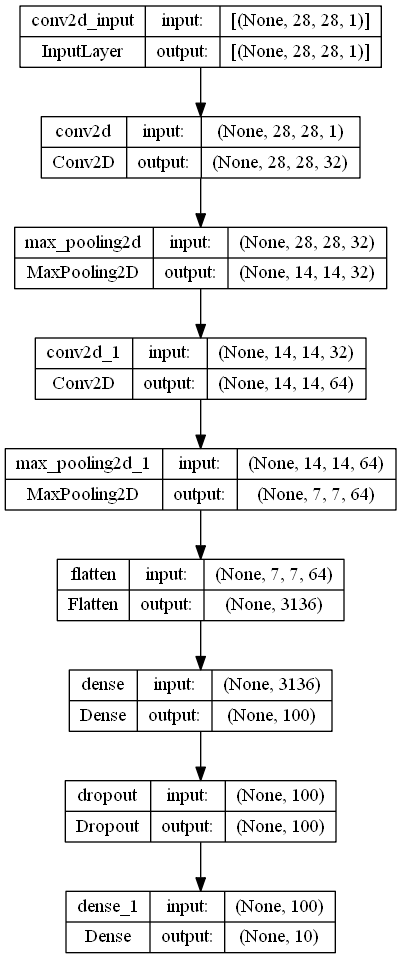

In [9]:
keras.utils.plot_model(model, show_shapes=True)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 55s 36ms/step - loss: 0.5051 - accuracy: 0.8181 - val_loss: 0.3125 - val_accuracy: 0.8832
Epoch 2/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.3311 - accuracy: 0.8808 - val_loss: 0.2870 - val_accuracy: 0.8950
Epoch 3/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.2837 - accuracy: 0.8977 - val_loss: 0.2656 - val_accuracy: 0.9005
Epoch 4/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.2503 - accuracy: 0.9098 - val_loss: 0.2371 - val_accuracy: 0.9134
Epoch 5/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2253 - accuracy: 0.9178 - val_loss: 0.2191 - val_accuracy: 0.9192
Epoch 6/20
1500/1500 [==============================] - 62s 42ms/step - loss: 0.2065 - accuracy: 0.9237 - val_loss: 0.2126 - val_accuracy: 0.9216
Epoch 7/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.1895 - accuracy: 0.9295 - val_loss: 0.2284 -

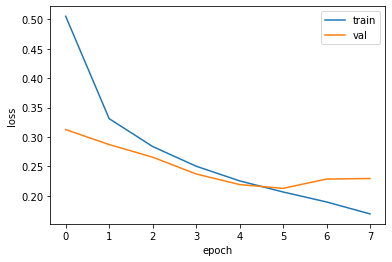

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 9ms/step - loss: 0.2126 - accuracy: 0.9216


[0.2126002460718155, 0.921583354473114]

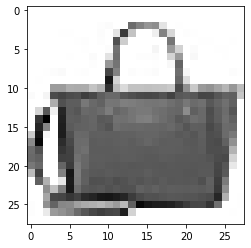

In [13]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [14]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 140ms/step
[[3.8550659e-15 4.2631679e-22 5.3479813e-16 3.5822934e-18 1.8393919e-17
  8.6380596e-14 5.0273786e-15 1.3128465e-15 1.0000000e+00 1.7007978e-15]]


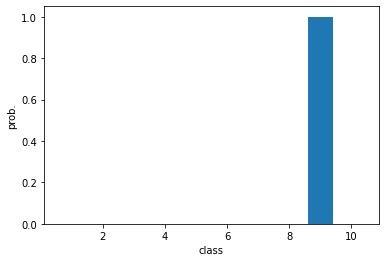

In [15]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [16]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '모트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [17]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [18]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [19]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 9ms/step - loss: 0.2394 - accuracy: 0.9148


[0.23944580554962158, 0.9147999882698059]